### mens teams taht have qualified are china, japan, and uk

## Qualifications are from 2022 and 2023 world artistic gymnatics championship 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../Cleaning/cleaned22to23mens_September.csv')

In [3]:
df

,Name,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,Fredrik AAS,NOR,2023-02-26 20:23:00,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",HB,39.0,4.6,6.700,0.0,11.300
1,Fredrik AAS,NOR,2023-02-26 20:23:00,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",PH,44.0,4.4,7.800,0.0,12.200
2,Fredrik Bjornevik AAS,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",FX,54.0,4.0,8.566,0.0,12.566
3,Fredrik Bjornevik AAS,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",HB,44.0,4.6,8.166,0.0,12.766
4,Fredrik Bjornevik AAS,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",PB,54.0,4.4,8.066,0.0,12.466
...,...,...,...,...,...,...,...,...,...,...,...,...
5368,Ahmet Önder,TUR,2001-06-04 20:23:00,2023 Tel Aviv Challenge Cup,final,"Tel Aviv, Israel",FX,8.0,4.8,7.050,0.0,11.850
5369,Ahmet Önder,TUR,2001-06-04 20:23:00,2023 Tel Aviv Challenge Cup,qual,"Tel Aviv, Israel",FX,3.0,5.8,7.950,0.1,13.650
5370,Ahmet Önder,TUR,2001-06-04 20:23:00,2023 Tel Aviv Challenge Cup,qual,"Tel Aviv, Israel",HB,10.0,5.0,6.250,0.0,11.250
5371,Ahmet Önder,TUR,2001-06-04 20:23:00,2023 Tel Aviv Challenge Cup,final,"Tel Aviv, Israel",PB,1.0,6.3,8.050,0.0,14.350


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5373 non-null   object 
 1   Country      5373 non-null   object 
 2   Date         5373 non-null   object 
 3   Competition  5373 non-null   object 
 4   Round        5373 non-null   object 
 5   Location     5373 non-null   object 
 6   Apparatus    5373 non-null   object 
 7   Rank         5373 non-null   float64
 8   D_Score      5373 non-null   float64
 9   E_Score      5373 non-null   float64
 10  Penalty      5373 non-null   float64
 11  Score        5373 non-null   float64
dtypes: float64(5), object(7)
memory usage: 503.8+ KB


In [23]:
df["Name"] = df["Name"].str.lower()

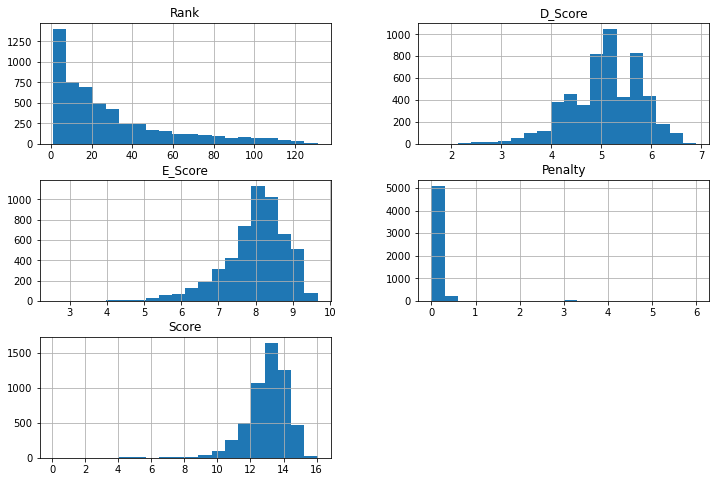

In [5]:
numeric_columns = df.select_dtypes(include=['float64'])
numeric_columns.hist(bins=20, figsize=(12, 8))
plt.show()

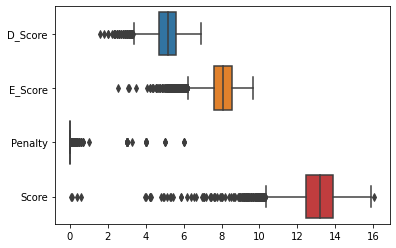

In [6]:
# Box plots for numeric columns
numeric_columns = numeric_columns.drop(columns=["Rank"])
sns.boxplot(data=numeric_columns, orient="h")
plt.show()


In [7]:
# # Step 4: Correlation Heatmap
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

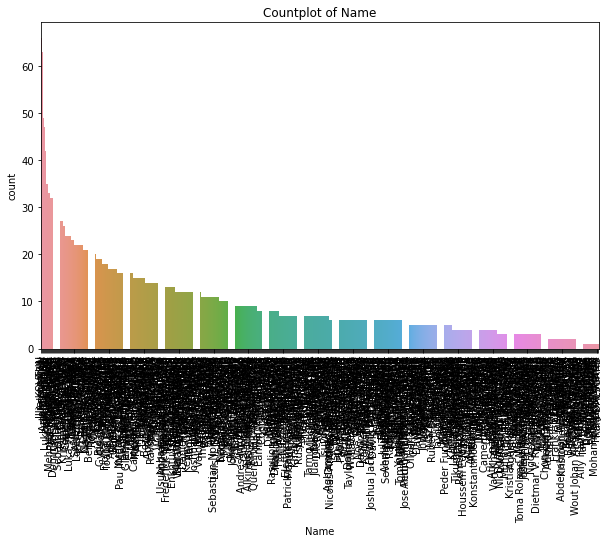

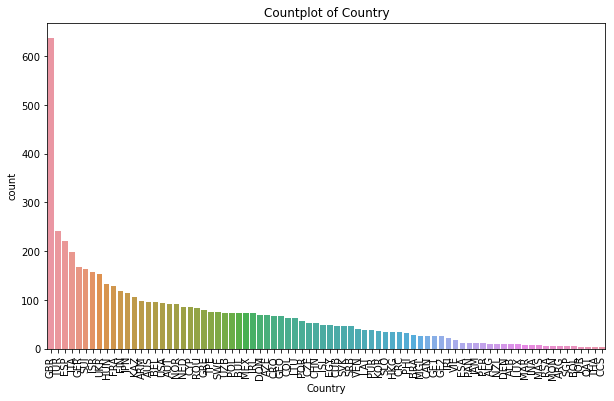

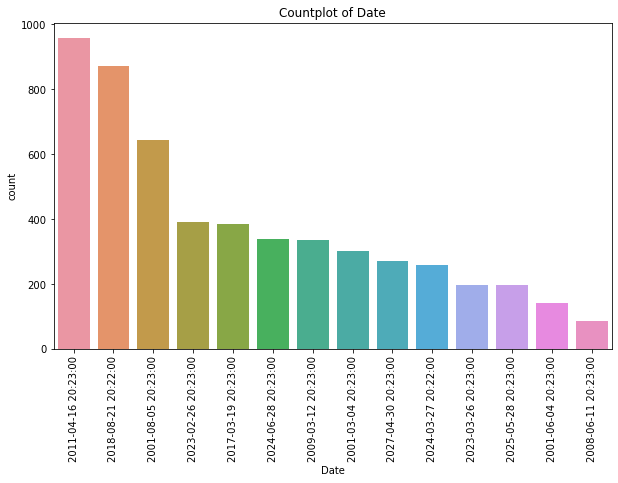

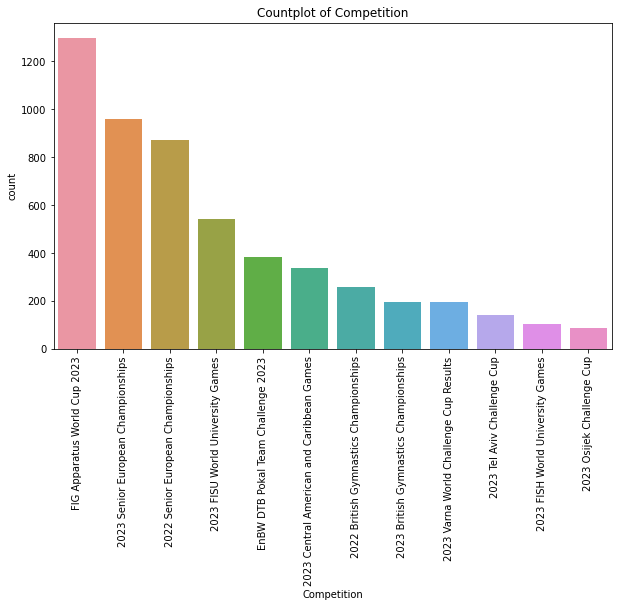

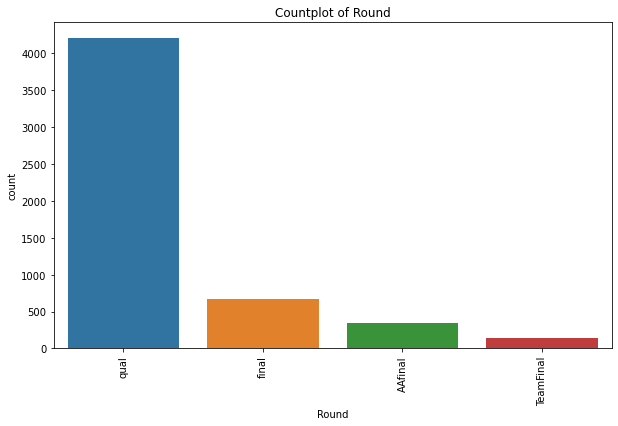

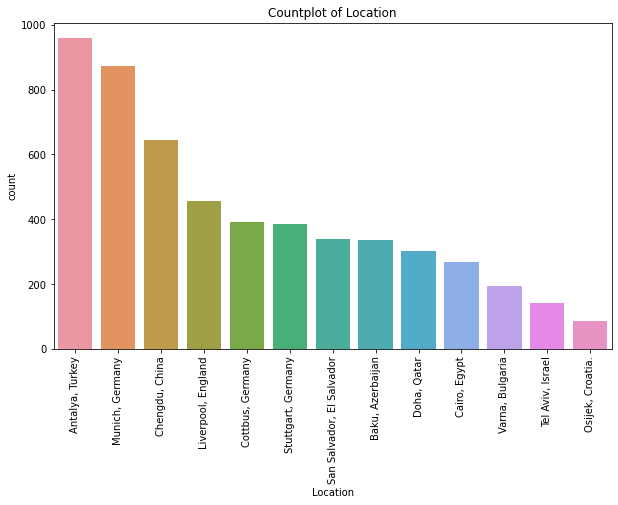

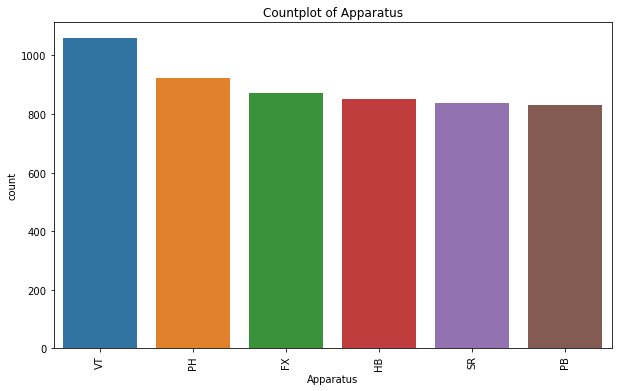

In [8]:
# Countplot for categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Countplot of {col}")
    plt.show()
    

In [25]:
# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
df_sorted = df.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a DataFrame to store the top 5 performers for each apparatus
top5_by_apparatus = []

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]
    
    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()
    
    top5_for_apparatus = []
    
    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])
    
    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)
    
    
    # Append the top 5 performers for this apparatus to the list
    top5_by_apparatus.append(top5_for_apparatus_df)

# Display the top 5 performers for each apparatus
for apparatus, top5 in zip(apparatus_names, top5_by_apparatus):
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score']])
    print("\n")


Top 5 on HB:
                             Name Country   Score
1667              daiki hashimoto     JPN  15.266
5312                 boheng zhang     CHN  15.233
4417                     cong shi     CHN  15.200
2159                 milad karimi     KAZ  14.800
2263              shohei kawakami     JPN  14.700
4060  frederick nathaniel richard     USA  14.600
1163                  ryosuke doi     JPN  14.550
1338                   joe fraser     GBR  14.400
1488              marios georgiou     CYP  14.400
4943              robert tvorogal     LTU  14.366


Top 5 on PH:
                   Name Country   Score
2737           chih lee     TPE  15.500
2634   nariman kurbanov     KAZ  15.400
5176   max whitlock obe     GBR  15.100
1669    daiki hashimoto     JPN  15.033
2746       chih kai lee     TPE  15.033
3083  rhys mc clenaghan     IRL  15.033
2320   gagik khachikyan     ARM  15.000
4424           yu shiao     TPE  14.930
325      abdulla azimov     UZB  14.866
4432       yu jan shia

In [34]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on HB:
                             Name Country   Score  Rank  D_Score  E_Score  \
1667              daiki hashimoto     JPN  15.266   1.0      6.7    8.566   
5312                 boheng zhang     CHN  15.233   2.0      6.4    8.833   
4417                     cong shi     CHN  15.200   3.0      6.2    9.000   
2159                 milad karimi     KAZ  14.800   1.0      6.3    8.500   
2263              shohei kawakami     JPN  14.700   5.0      6.2    8.500   
4060  frederick nathaniel richard     USA  14.600   6.0      6.2    8.400   
1163                  ryosuke doi     JPN  14.550   2.0      6.4    8.150   
1338                   joe fraser     GBR  14.400   1.0      5.7    8.700   
1488              marios georgiou     CYP  14.400   1.0      6.0    8.400   
4943              robert tvorogal     LTU  14.366   1.0      5.6    8.766   

      Penalty  
1667      0.0  
5312      0.0  
4417      0.0  
2159      0.0  
2263      0.0  
4060      0.0  
1163      0.0  
1338      0

In [28]:
usa = df[df['Country']=='USA']

In [30]:
usa

,Name,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
532,landen paul blixt,USA,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",FX,59.0,5.4,7.533,0.6,12.333
533,landen paul blixt,USA,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",HB,29.0,4.8,8.500,0.0,13.300
534,landen paul blixt,USA,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",PB,24.0,5.3,8.266,0.0,13.566
535,landen paul blixt,USA,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",PH,35.0,5.1,7.533,0.0,12.633
536,landen paul blixt,USA,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",SR,55.0,4.4,8.100,0.0,12.500
...,...,...,...,...,...,...,...,...,...,...,...,...
5179,donnell whittenburg,USA,2027-04-30 20:23:00,FIG Apparatus World Cup 2023,qual,"Cairo, Egypt",SR,11.0,5.8,8.133,0.0,13.933
5198,shane wiskus,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,4.0,5.6,8.700,0.0,14.300
5199,shane wiskus,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",HB,10.0,5.7,8.050,0.0,13.750
5200,shane wiskus,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",PB,3.0,6.0,8.750,0.0,14.750


In [33]:
# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
usa_sorted = usa.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])



# Create a DataFrame to store the top 5 performers for each apparatus
top5_by_apparatus = []

# Iterate over unique apparatus names
apparatus_names = usa['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = usa_sorted[usa_sorted['Apparatus'] == apparatus]
    
    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()
    
    top5_for_apparatus = []
    
    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])
    
    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)
    
    
    # Append the top 5 performers for this apparatus to the list
    top5_by_apparatus.append(top5_for_apparatus_df)

# Display the top 5 performers for each apparatus
for apparatus, top5 in zip(apparatus_names, top5_by_apparatus):
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score']])
    print("\n")


Top 5 on FX:
                             Name Country   Score
3266                 yul moldauer     USA  14.500
5198                 shane wiskus     USA  14.300
1753                   asher hong     USA  14.250
4052  frederick nathaniel richard     USA  14.166
4045            frederick richard     USA  14.050


Top 5 on HB:
                             Name Country   Score
4060  frederick nathaniel richard     USA  14.600
2969                 brody malone     USA  14.350
3814              curran phillips     USA  14.133
4046            frederick richard     USA  14.000
829      taylor troy christopulos     USA  13.833


Top 5 on PB:
                      Name Country   Score
3816       curran phillips     USA  15.500
4048     frederick richard     USA  14.900
5200          shane wiskus     USA  14.750
1755            asher hong     USA  14.700
2230  joshua andrew karnes     USA  14.533


Top 5 on PH:
                             Name Country   Score
4510                  ian skirkey 

In [36]:
# Sort the DataFrame by 'Apparatus' and 'Score' in descending order
usa_sorted = usa.sort_values(by=['Apparatus', 'Score'], ascending=[True, False])


# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = usa['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = usa_sorted[usa_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 5:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Display the top 5 performers for each apparatus including additional columns
for apparatus, top5 in top5_by_apparatus_dict.items():
    print(f"Top 5 on {apparatus}:")
    print(top5[['Name', 'Country', 'Score', 'Rank', 'D_Score', 'E_Score', 'Penalty']])
    print("\n")


Top 5 on FX:
                             Name Country   Score  Rank  D_Score  E_Score  \
3266                 yul moldauer     USA  14.500   2.0      5.7    8.800   
5198                 shane wiskus     USA  14.300   4.0      5.6    8.700   
1753                   asher hong     USA  14.250   6.0      6.0    8.350   
4052  frederick nathaniel richard     USA  14.166   3.0      6.1    8.066   
4045            frederick richard     USA  14.050  12.0      6.1    8.050   

      Penalty  
3266      0.0  
5198      0.0  
1753      0.1  
4052      0.0  
4045      0.1  


Top 5 on HB:
                             Name Country   Score  Rank  D_Score  E_Score  \
4060  frederick nathaniel richard     USA  14.600   6.0      6.2    8.400   
2969                 brody malone     USA  14.350   3.0      5.7    8.650   
3814              curran phillips     USA  14.133   2.0      5.5    8.633   
4046            frederick richard     USA  14.000   7.0      5.8    8.200   
829      taylor troy christo

In [39]:
fx = usa_sorted[usa_sorted["Apparatus"]== "FX"]

In [40]:
vt = usa_sorted[usa_sorted["Apparatus"]== "VT"]

In [41]:
sr = usa_sorted[usa_sorted["Apparatus"]== "SR"]

In [42]:
ph = usa_sorted[usa_sorted["Apparatus"]== "PH"]

In [43]:
hb = usa_sorted[usa_sorted["Apparatus"]== "HB"]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Create a dictionary to store top 5 performers for each apparatus
top5_by_apparatus_dict = {}

# Iterate over unique apparatus names
apparatus_names = df['Apparatus'].unique()
for apparatus in apparatus_names:
    top5_per_apparatus = df_sorted[df_sorted['Apparatus'] == apparatus]

    # Create a set to keep track of names already in the top 5 for this apparatus
    top5_names_set = set()

    top5_for_apparatus = []

    # Iterate through rows in this apparatus's DataFrame
    for _, row in top5_per_apparatus.iterrows():
        if row['Name'] not in top5_names_set and len(top5_for_apparatus) < 10:
            top5_for_apparatus.append(row)
            top5_names_set.add(row['Name'])

    # Convert the list of top 5 for this apparatus to a DataFrame
    top5_for_apparatus_df = pd.DataFrame(top5_for_apparatus)

    # Store the top 5 performers for this apparatus in the dictionary
    top5_by_apparatus_dict[apparatus] = top5_for_apparatus_df

# Accessing the top 5 performers for a specific apparatus (e.g., 'HB'):
top5_for_PH = top5_by_apparatus_dict['PH']

# Accessing the top 5 performers for another apparatus (e.g., 'PH'):
top5_for_VT = top5_by_apparatus_dict['VT']

top5_for_FX = top5_by_apparatus_dict['FX']

top5_for_SR = top5_by_apparatus_dict['SR']

top5_for_HB = top5_by_apparatus_dict['HB']


In [53]:
top5_for_PH["Country"].value_counts()

Country
TPE    4
KAZ    1
GBR    1
JPN    1
IRL    1
ARM    1
UZB    1
Name: count, dtype: int64

In [54]:
top5_for_VT["Country"].value_counts()

Country
GBR    3
UKR    2
USA    1
ARM    1
TUR    1
IRI    1
PHI    1
Name: count, dtype: int64

In [55]:
top5_for_FX["Country"].value_counts()

Country
GBR    3
JPN    3
TUR    1
ISR    1
PHI    1
KAZ    1
Name: count, dtype: int64

In [56]:
top5_for_SR["Country"].value_counts()

Country
CHN    4
GRE    1
TUR    1
AZE    1
AUT    1
GBR    1
ARM    1
Name: count, dtype: int64

In [57]:
top5_for_HB["Country"].value_counts()

Country
JPN    3
CHN    2
KAZ    1
USA    1
GBR    1
CYP    1
LTU    1
Name: count, dtype: int64